--- Building on example 2 in this example you will also use the weight (wht) map to obtain an estimate of the significance of each pixel.

In [1]:
import numpy as np
from astropy.io import fits

In [2]:
image_dir = 'data' # define image directory relative to this script

In [3]:
f = 'f125w' # filter

In [4]:
sci = fits.getdata(f'{image_dir}/{f}_sci.fits') # read science FITS file data into numpy array
wht = fits.getdata(f'{image_dir}/{f}_wht.fits') # read weight FITS file data into numpy array

In [5]:
mask = fits.getdata(f'{image_dir}/mask.fits') # read in the image mask
sci = np.ma.masked_array(sci, mask = mask) # apply the mask to our science image
wht = np.ma.masked_array(wht, mask = mask) # apply the mask to our weight image

--- cut out a portion of the image for analysis

In [6]:
x = sci.shape[0] // 2 # pixel x-centre of cutout, must be an integer
y = sci.shape[1] // 2  # pixel y-centre of cutout, must be an integer
r = 150

In [7]:
sci = sci[x-r:x+r, y-r:y+r] # cutout a portion of the science image
wht = wht[x-r:x+r, y-r:y+r] # cutout a portion of the weight image

--- define the noise in each pixel and make a significance map (signal/noise)

In [8]:
noise = 1./np.sqrt(wht) #Â conversion from weight to noise
sig = sci/noise # signifance map

--- plot the cutout significance map

In [9]:
import matplotlib.pyplot as plt

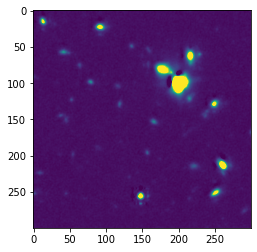

In [10]:
plt.imshow(sig, vmin=-2, vmax = 50) # set scale so max significance is 50
plt.show()

--- the above figure can be improved by using two difference scales: one for pixels sig<2 and one for those above. This nicely highlights pixels above some noise threshold. To do this we first plot the map with sig<2 and then plot a masked image o pixels with sig>threshold

In [11]:
import numpy.ma as ma

In [12]:
threshold = 2

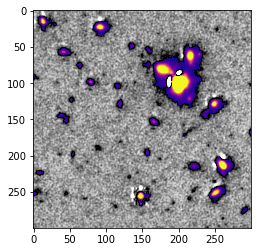

In [13]:
plt.imshow(sig, vmin = -threshold, vmax = threshold, cmap = 'Greys')
plt.imshow(np.ma.masked_where(sig <= threshold, sig), cmap = 'plasma', vmin = threshold, vmax = 50)
plt.show()

version to save

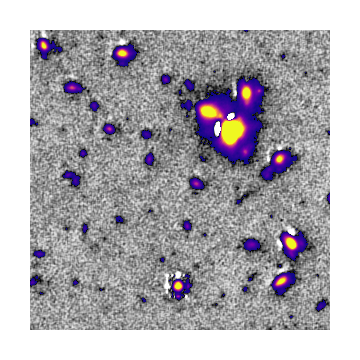

In [14]:
fig = plt.figure(figsize = (1, 1), dpi = sig.shape[0])
ax = fig.add_axes((0.0, 0.0, 1.0, 1.0)) # define axes to cover entire field
ax.axis('off') # turn off axes frame, ticks, and labels
ax.imshow(sig, vmin = -threshold, vmax = threshold, cmap = 'Greys')
ax.imshow(np.ma.masked_where(sig <= threshold, sig), cmap = 'plasma', vmin = threshold, vmax = 50)
fig.savefig('significance.png')